In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

<h2>1. Introduction</h2>

<h3> About Dataset </h3> <br>

This dataset contains a comprehensive list of Spotify songs with their genres retrieved from Spotify API. <br>
**Key Features** <br>


1. danceability: Indicating how suitable the song is for dancing
2. energy: Perceived energy level of the song
3. key: Key of the song
4. loudness: Amount of loudness in the song
5. mode: Mode of the song (major or minor)
6. speechiness: Amount of spoken words in the song
7. acousticness: Amount of acoustic sound in the song
8. instrumentalness: Amount of instrumental content in the song
9. liveness: Presence of live performance elements
10. valence: Positivity of the song's musical content
11. tempo: Tempo of the song
12. type
13. id: Song ID
14. uri: The Spotify URI for the track.
15. track_href: A link to the Web API endpoint providing full details of the track.
16. analysis_url: A URL to access the full audio analysis of this track.
17. duration_ms: Duration of the song in milli second
18. time_signature: Time signature of the song
19. genre: Genre of the song - Target Variable
20. song_name: Name of the song
21. Unnamed: 0
22. title




* With this dataset, we are going to analyze each and every factors which can influence the **genre of the songs**.
* So that we can find a good model to predict better results.
* At the end we are going deploy that model which take the user input and predict the genre of the song.



<h2>2.Data Preprocessing</h2>

In [ ]:
#Reading the Data
df = pd.read_csv("/content/drive/MyDrive/Data Set for Colab/Song_Genre.csv")
#Displaying first 10 records
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,...,6fsypiJHyWmeINsOLC1cos,spotify:track:6fsypiJHyWmeINsOLC1cos,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Dark Trap,Gatteka,NaN,NaN
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,...,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4,Dark Trap,kamikaze (+ pulse),NaN,NaN
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,...,0LLeuNBWPOg3XA73yab3PT,spotify:track:0LLeuNBWPOg3XA73yab3PT,https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...,https://api.spotify.com/v1/audio-analysis/0LLe...,127524,3,Dark Trap,T.R.U. (Totally Rotten Underground),NaN,NaN
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,...,37gqBnUAZe8BY8WR56kDNk,spotify:track:37gqBnUAZe8BY8WR56kDNk,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,Dark Trap,I Put My Dick in Your Mental,NaN,NaN
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,...,2ggqfj97qyiORmXoVFzP5j,spotify:track:2ggqfj97qyiORmXoVFzP5j,https://api.spotify.com/v1/tracks/2ggqfj97qyiO...,https://api.spotify.com/v1/audio-analysis/2ggq...,121979,4,Dark Trap,Andromeda,NaN,NaN


In [ ]:
#Dataset attributes
print(df.shape)
df.info()

(42305, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-

Q1. Divide the data columns into categorical and numerical?
*   **Categorical Columns** <br>
type, id, uri, track_href, analysis_url, genre, song_name, title <br>
*   **Numerical Columns** <br>
danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, Unnamed: 0,





In [ ]:
#Five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.52400,0.64600,0.766,0.988
energy,42305.0,0.762516,0.183823,0.000243,0.63200,0.80300,0.923,1.000
key,42305.0,5.370240,3.666145,0.000000,1.00000,6.00000,9.000,11.000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.16100,-6.23400,-4.513,3.148
mode,42305.0,0.549462,0.497553,0.000000,0.00000,1.00000,1.000,1.000
speechiness,42305.0,0.136561,0.126168,0.022700,0.04910,0.07550,0.193,0.946
acousticness,42305.0,0.096160,0.170827,0.000001,0.00173,0.01640,0.107,0.988
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.00000,0.00594,0.722,0.989
liveness,42305.0,0.214079,0.175576,0.010700,0.09960,0.13500,0.294,0.988
valence,42305.0,0.357101,0.233200,0.018700,0.16100,0.32200,0.522,0.988


* Since 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',  'song_name', 'Unnamed: 0', 'title' columns are not significant features to decide 'genre', so we can remove them.
* This will help to dimensionality reduction leads to reduce the complexity and can improve accuracy due to misleading data.



In [ ]:
#Removing unwanted columns
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'song_name', 'Unnamed: 0', 'title'], axis=1)

In [ ]:
#No of missing value in the dataset
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
dtype: int64

Handling missing values is very important in the data preprocessing step.
There is no null values in the updated dataframe. Otherwise,

Q2. How to handle missing/null values?
1. Remove those null values from the dataset where the count is less so we don't loose much data
2. Replace the null values with appropriate values (mean, median, mode of the data column)
3. Use ML models (Imputers) to predict the missing values


In [ ]:
#Removing any duplicate values
df.drop_duplicates(inplace=True)
df.shape

(38123, 13)

In [ ]:
df.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
time_signature          4
genre                  15
dtype: int64

<h2>3.Data Visualization

* Data visualization is a key step for the explotary data analysis which help to identify general patterns in the data




In [ ]:
df['genre'].value_counts()

genre
Underground Rap    5771
Dark Trap          4517
Hiphop             2960
trance             2734
techno             2632
psytrance          2610
dnb                2407
hardstyle          2277
trap               2226
techhouse          2192
RnB                2039
Trap Metal         1897
Rap                1808
Emo                1601
Pop                 452
Name: count, dtype: int64

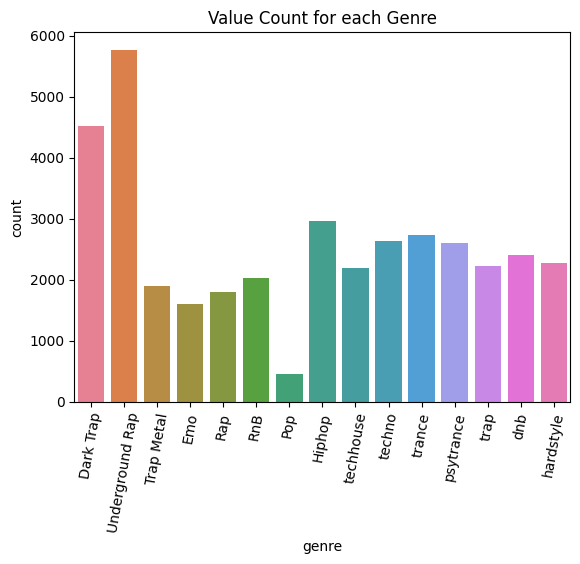

In [ ]:
sns.countplot(data=df, x='genre', hue='genre')
plt.xticks(rotation=80)
plt.title("Value Count for each Genre")
plt.show()

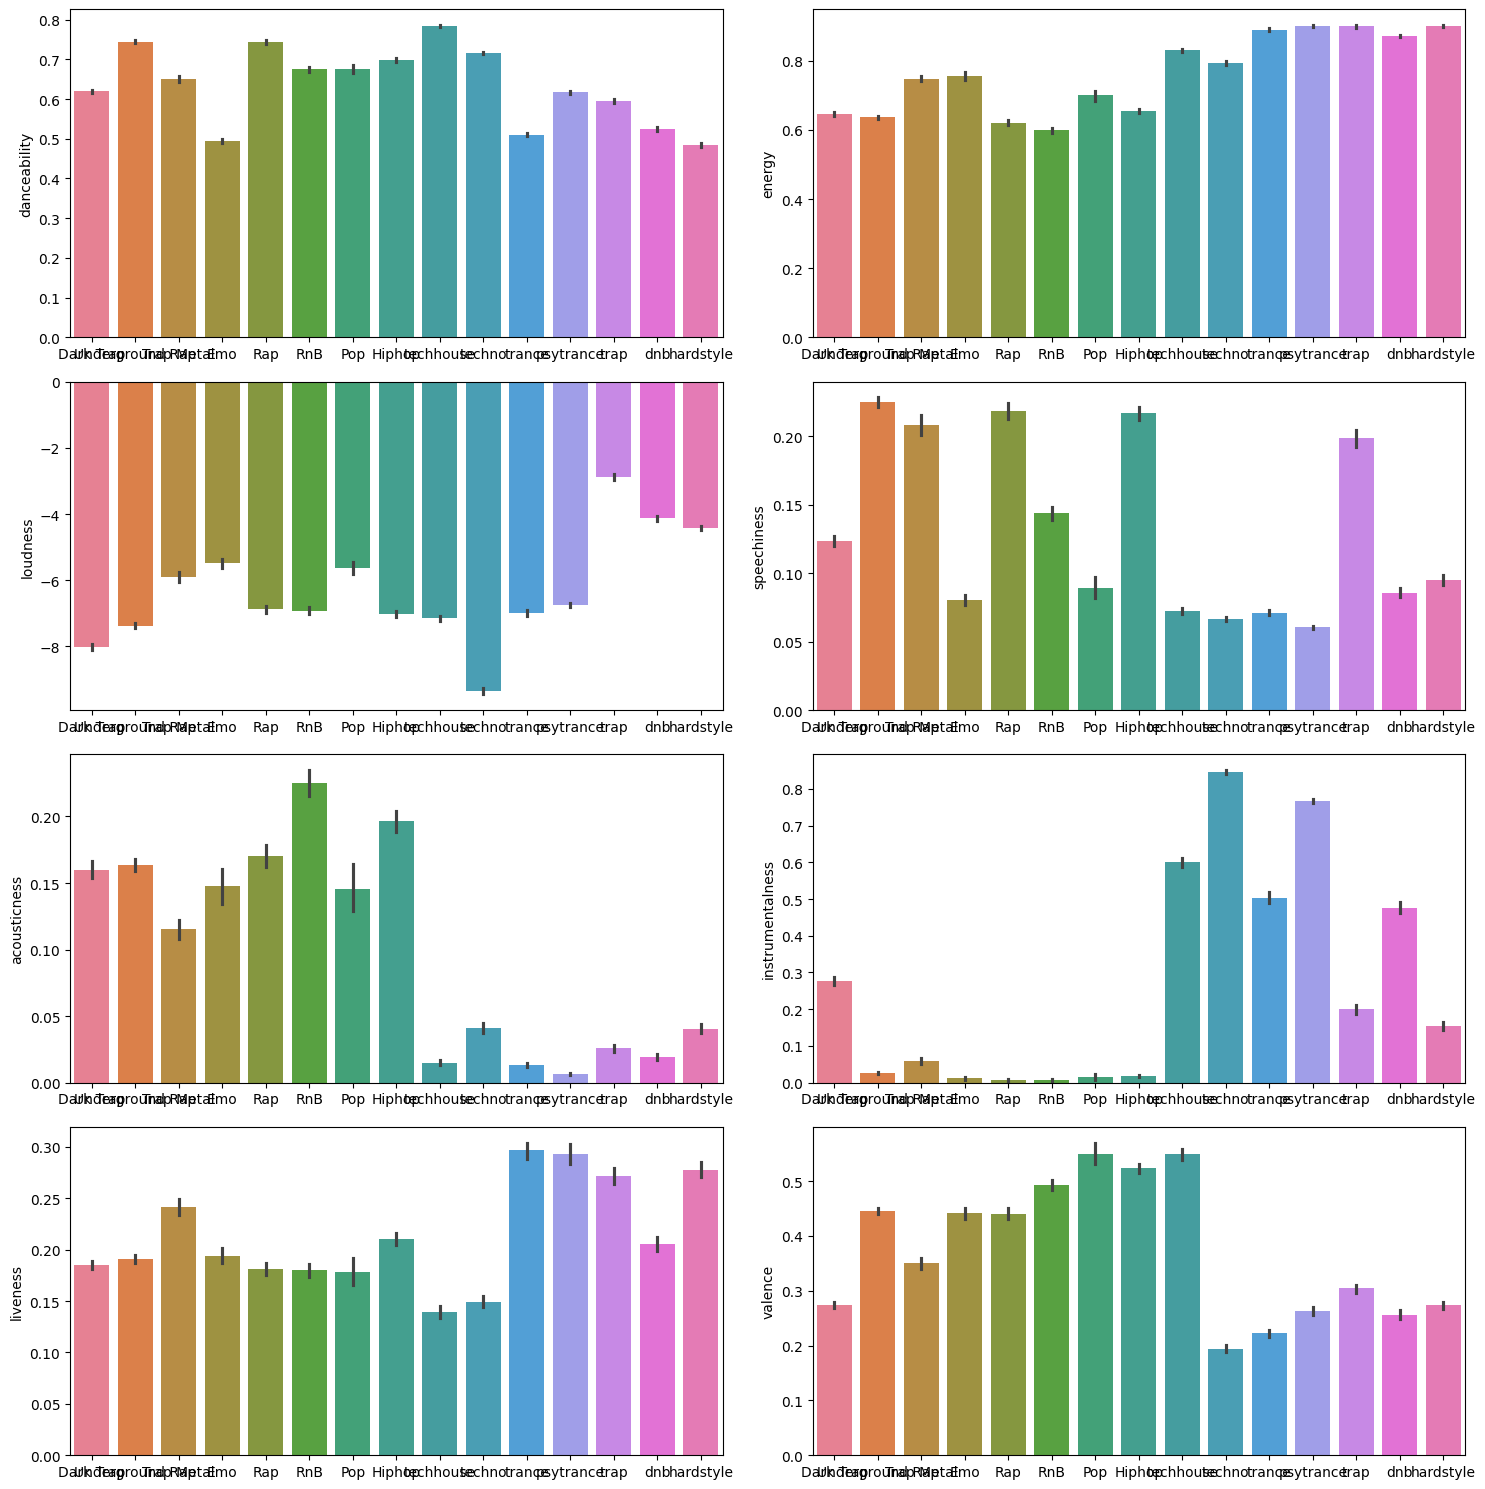

In [ ]:
#Average value of song features Vs. Genre
fig, ax = plt.subplots(4, 2, figsize=(15,15))
for i, y in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']):
  sns.barplot(ax=ax[i//2,i%2], data=df, x='genre', y=y, hue='genre')
  ax[i//2, i%2].set_xlabel('')

plt.tight_layout()
plt.show()


From the above graphs,

*  Most of the genres are equally distributed in counts
*   Features like valence, liveness, instrumentalness, acousticness, speechiness, loudness have a significant impact in genres



<h2>4.Outlier Handling

* Outliers are data points that deviate significantly from other data points.
* Now we need to identify the outliers in the dataset and remove them. So we can get a clean data. - Data Cleaning
* For this we use Interquartile Range(IQR) method <br>
Q3. Explain the IQR method?
1. The data is sorted in ascending order and split into 4 equal parts by Q1, Q2 and Q3
2. Q1, Q2, Q3 are represent 25th, 50th, 75th percentile of the data
3. IQR = Q3 - Q1
4. Data points which fall below Q1-1.5(IQR) or above Q3+1.5(IQR) are outliers

* We can use visualisation techniques like boxplot to detect outliers



<Axes: ylabel='danceability'>

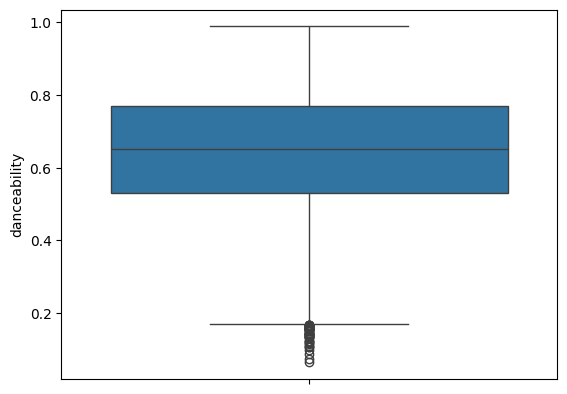

In [ ]:
#Box plot for danceability
sns.boxplot(df['danceability'])

In [ ]:
#Detecting outliers
def bound(x):
  q1 = np.percentile(x, 25, method='midpoint')
  q3 = np.percentile(x, 75, method='midpoint')
  IQR = q3 - q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR
  return lower_bound, upper_bound

for i, y in enumerate(['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']):
  lb, ub = bound(df[y])
  outliers = df[y][(df[y]<lb) | (df[y]>ub)]
  print('# of outliers of '+ y + ':' + str(len(outliers)))

# of outliers of danceability:50
# of outliers of energy:110
# of outliers of key:0
# of outliers of loudness:751
# of outliers of speechiness:1348
# of outliers of acousticness:4385
# of outliers of instrumentalness:0
# of outliers of liveness:2286
# of outliers of valence:0
# of outliers of tempo:322


In [ ]:
#Removing outliers
for i, y in enumerate(['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']):
  lb, ub = bound(df[y])
  df = df[(df[y]>=lb) & (df[y]<=ub)]

#Data frame for Neural Network
nn_df = df.copy()
df.shape

(29480, 13)

In [ ]:
#Value count for each genre after handling outliers
df['genre'].value_counts()

genre
Underground Rap    3998
Dark Trap          3054
trance             2404
techno             2337
dnb                2233
psytrance          2221
techhouse          2108
hardstyle          2018
Hiphop             1963
trap               1808
Trap Metal         1321
RnB                1274
Emo                1232
Rap                1171
Pop                 338
Name: count, dtype: int64

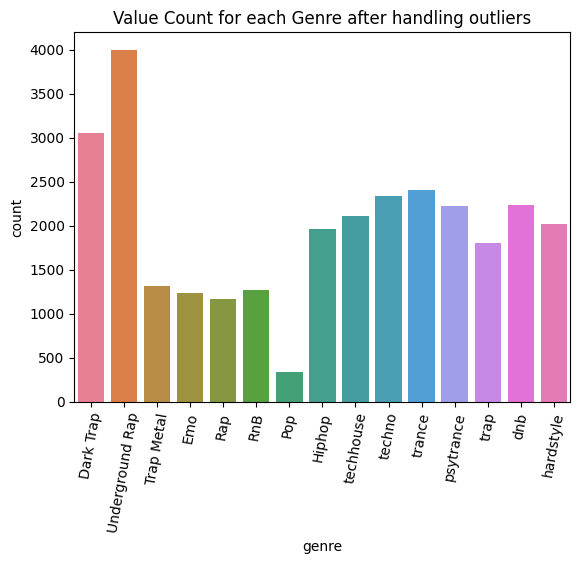

In [ ]:
sns.countplot(data=df, x='genre', hue='genre')
plt.xticks(rotation=80)
plt.title("Value Count for each Genre after handling outliers")
plt.show()

The shape of the data distribution hasn't change much.

<h2>5.Feature Engineering </h2>

Now we have a data without outliers. Next we need to prepare the data for ML model.<br>
We already remove unwanted columns

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre'],
      dtype='object')

There are no any linear dependent varibles. Otherwise we need to remove them as well.

Let's check for correlated variables because correlated variables don't improve models due to redundant information.

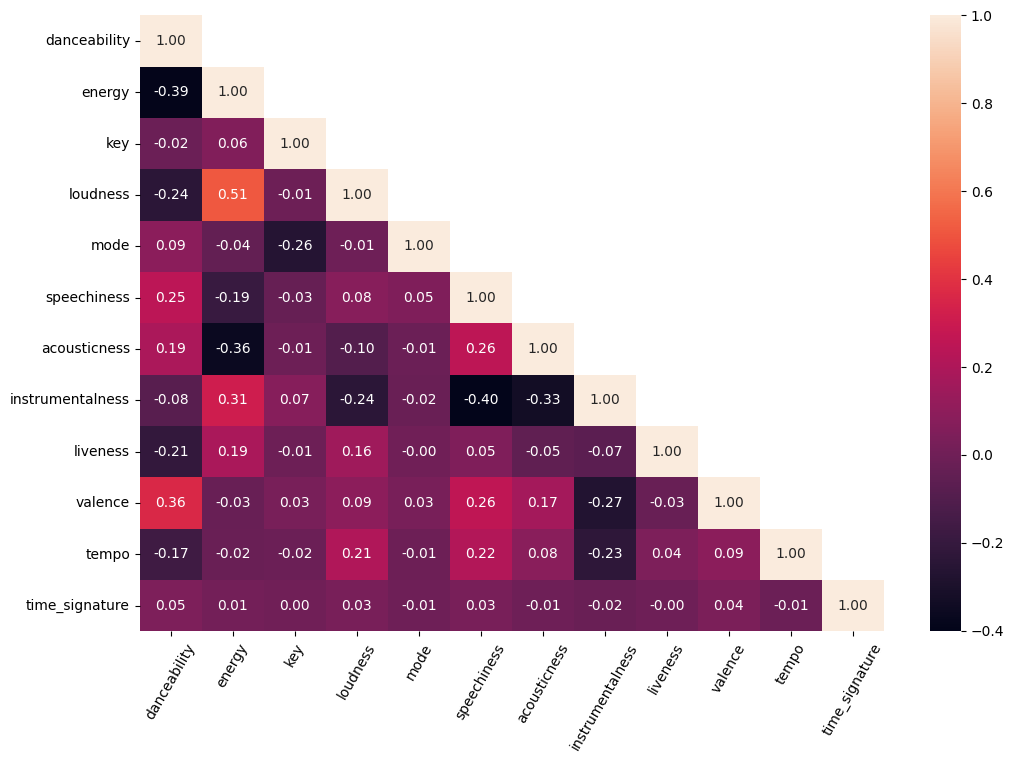

In [ ]:
#Correlation with heat map
df_copy = df.copy()
df_copy = df_copy.drop(['genre'], axis=1)
plt.figure(figsize=(12, 8))
corr = df_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)

We can see none of the attributes are not much correlated neither way(positive or negative) to each other. <br>
All are below 0.6 which mean there are no correlated variables. <br>
Otherwise, we need to remove or linearly combine the highly correlated variables.

<h2>6.Encoding</h2>

* We don't have any categorical variable in features. Only have 'genre', our target variable that needs to be encoded to numerical form. <br>
Q4. Which encoding is better for this data set? Why?
* Label encoding. The no of categories is quite large(15) so by considering high memory consumption in One-hot encoding, We do label encoding.



In [ ]:
#Encoding target variable 'genre'
label_encoder = LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])
print(df['genre'].unique())
df.head()

[ 0  7  6  1  4  5  3  2 11 12 13 10 14  8  9]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.420,0.0598,0.0134,0.0556,0.389,156.985,4,0
3,0.476,0.781,0,-4.710,1,0.103,0.0237,0.0000,0.1140,0.175,186.948,3,0
4,0.798,0.624,2,-7.668,1,0.293,0.2170,0.0000,0.1660,0.591,147.988,4,0
5,0.721,0.568,0,-11.295,1,0.414,0.0452,0.2120,0.1280,0.109,144.915,4,0
6,0.718,0.668,8,-4.162,1,0.137,0.0254,0.0078,0.1240,0.038,130.826,4,0


In [ ]:
df['genre'].value_counts()

genre
7     3998
0     3054
13    2404
12    2337
8     2233
10    2221
11    2108
9     2018
2     1963
14    1808
6     1321
5     1274
1     1232
4     1171
3      338
Name: count, dtype: int64

<h2>7.Train and Test Data Split

In [ ]:
x = df.drop(['genre'], axis=1)
y = df['genre']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
fs = x_train.describe().T
# print(fs)

<h2>8.Feature Scaling</h2>

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

To ensure scaling is done consistently across both the train and test data, "fit_transform" is used on x_train and "transform" is used on x_test to apply the same transformation that was learned from the training data (without refitting) to the test data.

Q5. Why we are choosing MinMaxScaler for the feature scaling?

* Data doesn't contain outliers so the scaling will not be affected by outliers
* Many of the features are lies within the predefined range(0-1)



<h2>9.Model Selection</h2>

Model selection is the process of choosing the
best model from a set of candidate models for a
specific task.

Now we need to find a best model as a classifier for this multi class(15) classification.


1. Logistic Regression
2. K-Nearest Neighbors(KNN)
3. Naive Bayes(NB)
4. Support Vector Machine(SVM)
5. Decision Tree
6. Random Forest
7. Extreme Gradient Boosting(XGBoost)
8. Gradient Boosting




In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost', XGBClassifier(random_state=42)),
    ('Gradient Boosting',  GradientBoostingClassifier(random_state=42))
]
best_model = None
best_accuracy = 0.0

for name, model in models:
  cv = cross_val_score(model, x_train, y_train, cv=5)
  cv_accuracy = cv.mean()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('Model: ', name)
  print('Cross Validation Accuracy: ', cv_accuracy)
  print('Model Test Accuracy: ', accuracy)
  print()
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = name

print('Best Model and accuracy: ', best_model, best_accuracy)


Model:  Logistic Regression
Cross Validation Accuracy:  0.5328552940270445
Model Test Accuracy:  0.5403663500678426

Model:  KNearest Neighbors
Cross Validation Accuracy:  0.4842505653824408
Model Test Accuracy:  0.48801447308909995

Model:  Naive Bayes
Cross Validation Accuracy:  0.538621713597166
Model Test Accuracy:  0.5419493441881501

Model:  Support Vector Machine
Cross Validation Accuracy:  0.5804904317004864
Model Test Accuracy:  0.5888738127544098

Model:  Decision Tree
Cross Validation Accuracy:  0.5107095127004431
Model Test Accuracy:  0.513681592039801

Model:  Random Forest
Cross Validation Accuracy:  0.6158171372865023
Model Test Accuracy:  0.6160108548168249

Model:  XGboost
Cross Validation Accuracy:  0.6250729855198232
Model Test Accuracy:  0.6260741745816373

Model:  Gradient Boosting
Cross Validation Accuracy:  0.643487019683198
Model Test Accuracy:  0.650497512437811

Best Model and accuracy:  Gradient Boosting 0.650497512437811


With the above results, by considering the accuracy metrics we can select **Gradient Boosting** as our model to predict song genre.



* We can see a clear difference in accuracy for Random Forest, XGboost and Gradient boosting compare with other models.
* Because those algorithms are ensemble learning techniques which mean collection of models is used to make prediction rather than an individual model.
* Ensemble uses two types of methods: bagging and boosting
* Here Random forest is bagging and other two are boosting




Q6.  What is the advantage of using Cross validation?


* Can reduce the model overfitting so it ensures the generalisation to new data
* Maximizes data utilisation - all available data contribute to the model



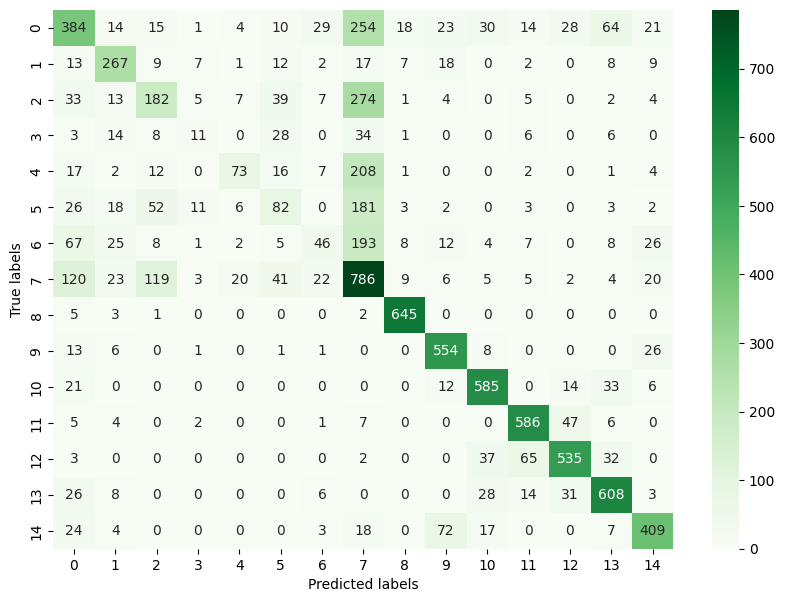

In [ ]:
#Confusion Matrix for the Model Gradient Boosting
cnf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
#Classification Report for Gradient Boosting
print('Gradient Boosting\n', classification_report(y_test, y_pred))

Gradient Boosting
               precision    recall  f1-score   support

           0       0.51      0.42      0.46       909
           1       0.67      0.72      0.69       372
           2       0.45      0.32      0.37       576
           3       0.26      0.10      0.14       111
           4       0.65      0.21      0.32       343
           5       0.35      0.21      0.26       389
           6       0.37      0.11      0.17       412
           7       0.40      0.66      0.50      1185
           8       0.93      0.98      0.96       656
           9       0.79      0.91      0.84       610
          10       0.82      0.87      0.84       671
          11       0.83      0.89      0.86       658
          12       0.81      0.79      0.80       674
          13       0.78      0.84      0.81       724
          14       0.77      0.74      0.75       554

    accuracy                           0.65      8844
   macro avg       0.62      0.59      0.59      8844
weighte



*   Higher precision and recall values are generally desired
*   Higher F1-score values indicate a better balance between precision and recall



Q7. With the classification report, what do you prefer to improve the performance of the model?

*   By looking at the count distribution with respect to song genre, there is a slight imblance in the data
*   This has been proved by the F1 scores of classes. (class 3 and class 6)
*   So,undersampling of majority class or generating synthetic samples of the minority class will balance the data and it will help to improve the performance
* To synthesize new samples of minority classes we can use SMOTE(Synthetic Minority Oversampling TEchnique) with the risk of potential overfitting


We can try hyper parameter tuning to improve the model performance for optimal results rather than using the model with default values.

In [ ]:
#Hyper Parameter Tuning
hyp_model = LogisticRegression(random_state=42)
param_grid = {'solver': ['newton-cg', 'lbfgs', 'saga', 'sag', 'newton-cholesky'], 'penalty': ['none', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
grid_search = GridSearchCV(hyp_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'sag',
                                    'newton-cholesky']},
             scoring='accuracy')

In [ ]:
best_param = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_param)
print("Accuracy:",accuracy)

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
Accuracy: 0.5050881953867028


Output shows accuracy is improved by hyperparameter tuning


Q8. What is the purpose of using cross validation along with Gridsearch? <br>
To avoid overfitting of the model

Q9. What is the drawback of using Gridsearch? <br>
It evaluates all the possible combination from the parameter grid, so it can be computationally expensive when the hyperparameter is large

The alternative for Gridsearch is RandomizedSearch. Exhaustive search through all combinations can be omitted.

<h2>10.Model Deployment</h2>

In [ ]:
def main():
  try:
    danceability = float(input("Enter danceability (0-1): "))
    energy = float(input("Enter energy (0-1): "))
    key = int(input("Enter key (0-11): "))
    loudness = float(input("Enter loudness (-35-5): "))
    mode = int(input("Enter mode (0/1): "))
    speechiness = float(input("Enter speechiness (0-1): "))
    acousticness = float(input("Enter acousticness (0-1): "))
    instrumentalness = float(input("Enter instrumentalness (0-1): "))
    liveness = float(input("Enter liveness (0-1): "))
    valence = float(input("Enter valence (0-1): "))
    tempo = float(input("Enter tempo (50-250): "))
    time_signature = int(input("Enter time_signature (1-5): "))
  except:
    print("Enter Numeric Value only")
    return -1
  #Feature Scaling for x_train
  X =  []
  for i, y in enumerate([danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature]):
    X.append((y - fs.iat[i,3]) / (fs.iat[i,7] - fs.iat[i,3]))

  x = np.array(X).reshape(1,12)
  y = model.predict(x)
  return y

In [ ]:
genre = main()
for i, name in enumerate(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse', 'techno', 'trance', 'trap']):
  if i == genre:
    print("The song genre is " + name)

Enter danceability (0-1): 0.93
Enter energy (0-1): 0.45
Enter key (0-11): 7
Enter loudness (-35-5): -10
Enter mode (0/1): 1
Enter speechiness (0-1): 0.18
Enter acousticness (0-1): 0.11
Enter instrumentalness (0-1): 0.63
Enter liveness (0-1): 0.23
Enter valence (0-1): 0.27
Enter tempo (50-250): 200
Enter time_signature (1-5): 5
The song genre is Underground Rap


<h2>Neural Network as Classifier</h2>

*   Now we are going to implement Neural Network using Keras, a deep learning library to perform classification.



We got "nn_df" as our data which is followed by data preprocessing and data cleaning.

In [ ]:
#Features
nn_x = nn_df.drop(['genre'], axis=1).to_numpy()
#Target
nn_y = nn_df['genre'].to_numpy()

In [ ]:
#Encoding using LabelEncoder
label_encoder.fit(nn_y)
nn_y = label_encoder.transform(nn_y)

In [ ]:
#Data splitting
x_train, x_test, y_train, y_test = train_test_split(nn_x, nn_y, test_size=0.3, random_state=42)

In [ ]:
#Feature Scaling using MinMaxScaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
early_stopping1 = EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)
early_stopping2 = EarlyStopping(monitor = "val_accuracy", patience = 10, restore_best_weights = True)

nn_model = Sequential()

# Input layer
nn_model.add(Dense(256, activation="relu", input_shape=(12,)))

# Batch normalization and dropout
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))

# Hidden layers
nn_model.add(Dense(128, activation="relu"))
nn_model.add(Dense(128, activation="relu"))

# Batch normalization and dropout
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))

# Output layer
nn_model.add(Dense(64, activation="relu"))
nn_model.add(Dense(15, activation="softmax"))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

To prevent the over fitting of the model


*   Early stopping callbacks are declared based on validation loss and validation accuracy
*   Dropout layer is added

Batch Normalisation is added for stabilize training



In [ ]:
nn_model.compile(optimizer = Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [ ]:
nn_model_history = nn_model.fit(x_train, y_train,
                epochs = 50,
                verbose = 1, batch_size = 128,
                validation_data = (x_test, y_test),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/50
162/162 [==============================] - 3s 9ms/step - loss: 1.7482 - accuracy: 0.4163 - val_loss: 2.3631 - val_accuracy: 0.2246
Epoch 2/50
162/162 [==============================] - 2s 11ms/step - loss: 1.3412 - accuracy: 0.5394 - val_loss: 1.9183 - val_accuracy: 0.3247
Epoch 3/50
162/162 [==============================] - 2s 13ms/step - loss: 1.2505 - accuracy: 0.5639 - val_loss: 1.3375 - val_accuracy: 0.5301
Epoch 4/50
162/162 [==============================] - 1s 8ms/step - loss: 1.2032 - accuracy: 0.5778 - val_loss: 1.1675 - val_accuracy: 0.5929
Epoch 5/50
162/162 [==============================] - 1s 7ms/step - loss: 1.1675 - accuracy: 0.5885 - val_loss: 1.1213 - val_accuracy: 0.6123
Epoch 6/50
162/162 [==============================] - 1s 7ms/step - loss: 1.1529 - accuracy: 0.5937 - val_loss: 1.1019 - val_accuracy: 0.6125
Epoch 7/50
162/162 [==============================] - 1s 7ms/step - loss: 1.1350 - accuracy: 0.5964 - val_loss: 1.1174 - val_accuracy: 0.6116
Epoc

277/277 [==============================] - 1s 2ms/step


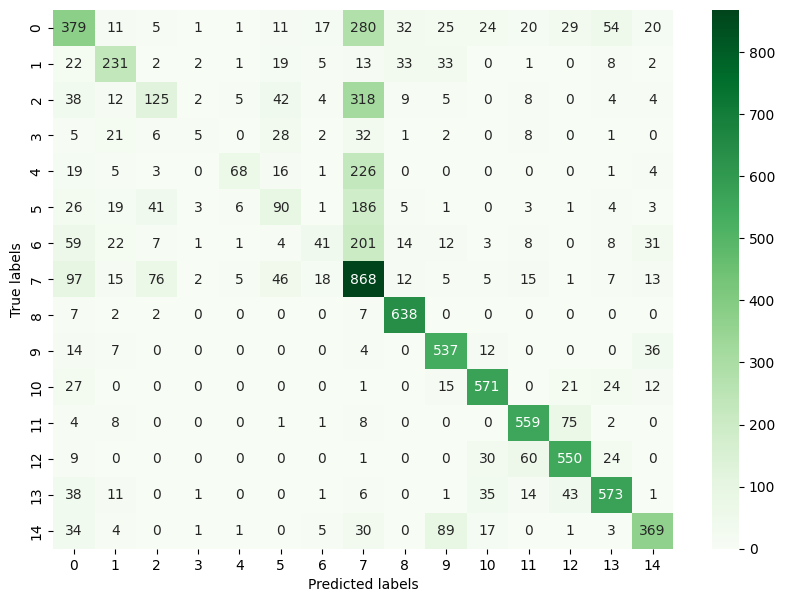

In [ ]:
#Confusion Matrix for the Neural Network model
y_pred = nn_model.predict(x_test).argmax(axis=1)
cnf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
#Classification report for Neural Network
print('Neural Network\n', classification_report(y_test, y_pred))

Neural Network
               precision    recall  f1-score   support

           0       0.49      0.42      0.45       909
           1       0.63      0.62      0.62       372
           2       0.47      0.22      0.30       576
           3       0.28      0.05      0.08       111
           4       0.77      0.20      0.32       343
           5       0.35      0.23      0.28       389
           6       0.43      0.10      0.16       412
           7       0.40      0.73      0.52      1185
           8       0.86      0.97      0.91       656
           9       0.74      0.88      0.80       610
          10       0.82      0.85      0.83       671
          11       0.80      0.85      0.83       658
          12       0.76      0.82      0.79       674
          13       0.80      0.79      0.80       724
          14       0.75      0.67      0.70       554

    accuracy                           0.63      8844
   macro avg       0.62      0.56      0.56      8844
weighted a